In [1]:
#hide
%load_ext autoreload
%autoreload 2

# Embedding Tool

> An embedding toolkit that can perform multiple embedding process which are low-dimensional embedding (dimension reduction), categorical variable embedding, and financial time-series embedding.

## Install

`pip install embedding-tool`

In [2]:
from embedding_tool.core import *

## How to use

## Dimension Reduction: `dimensionReducer` class
> The function performs dimensionality reduction, pre-processing the data and comparing the reconstruction error via PCA and autoencoder.

In [3]:
#hide
import pickle
import pandas as pd

with open('testing_data.pickle', 'rb') as handle:
    testing_data = pickle.load(handle)
    
print ("Data's size: ", testing_data.shape)
print ("Dimension:   ", testing_data.shape[1])

Data's size:  (863, 768)
Dimension:    768


**Input data:**
The input matrix has a size of 863 $\times$ 768.

In [14]:
print ("Data's size: ", testing_data.shape)

Data's size:  (863, 768)


**Performing dimension reduction:** we will reduce the number of dimension from 768 to 2. The learning rate of 0.002 will be use for the ADAM optimizer for the autoencoder model fitting.

In [5]:
dim_reducer = dimensionReducer(testing_data, 2, 0.002)
dim_reducer.fit()

**Calculating the MSE of the reconstructed vectors**

In [6]:
dim_reducer.rmse_result

,PCA,1AE,2AE
MSE,0.740122,0.741265,0.65168


Here we can see that the two-layers autoencoder has the best performance with the lowest MSE of 0.64.

**Observing the loss thorughout the epoch:** If we see that the MSE doesn't converge fast enough, we could adjust the learning rate parameter. The default is 0.002. Try increase it to 0.005 if it doesn't converge or decrease to 0.001 if it converges way too fast and oscillating.

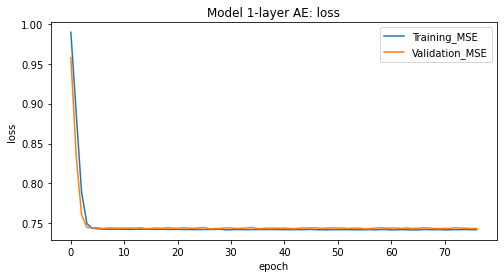

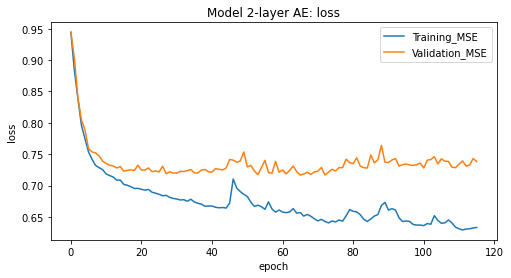

In [7]:
dim_reducer.plot_autoencoder_performance()

**Reduced Dimension Output:** There are three outputs from three different methods, which are PCA, 1-layer AE, and 2-layers AE.

In [8]:
dim_reducer.dfLowDimPCA.head()

,0,1
0,-16.078718,-6.701481
1,-8.858150,9.354204
2,4.305739,-0.464707
3,-11.514311,-0.687461
4,1.212006,6.537965


In [9]:
dim_reducer.dfLowDim1AE.head()

,0,1
0,-6.178097,4.734626
1,2.075333,5.529111
2,0.953502,-1.667776
3,-2.488155,4.001960
4,3.183654,0.589496


In [10]:
dim_reducer.dfLowDim2AE.head()

,0,1
0,32.622066,54.652271
1,35.649811,40.493984
2,15.314294,5.869064
3,19.667603,37.821194
4,36.183212,25.429262


**Plotting the embedding (for 2-dimensional embedding)**

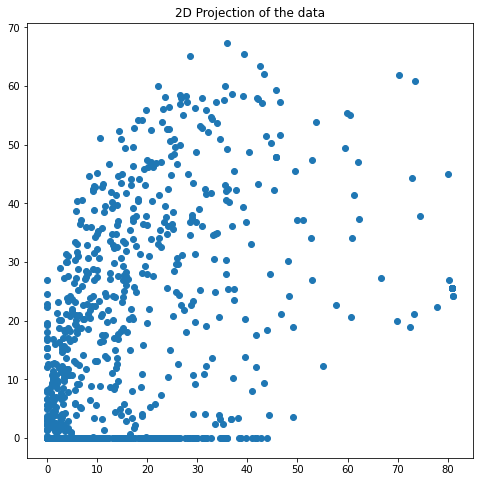

In [13]:
plot_output(dim_reducer.dfLowDim2AE)

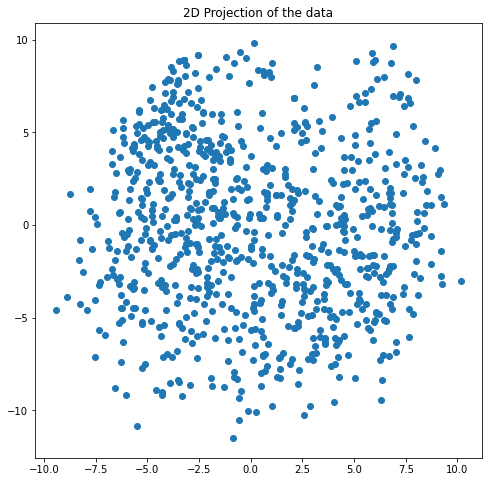

In [12]:
plot_output(dim_reducer.dfLowDim1AE)

***

# Reference: 
- https://towardsdatascience.com/dimensionality-reduction-pca-versus-autoencoders-338fcaf3297d
- https://towardsdatascience.com/autoencoders-vs-pca-when-to-use-which-73de063f5d7

***

In [7]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_dimensionReducer.ipynb.
Converted index.ipynb.
